In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mlt
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test)= fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
## Reshape for CNN
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [7]:
## Data Normalization
X_train_full_n = X_train_full/255.
X_test_n = X_test/255.

In [8]:
## Split data into Train, Validation & Test
X_valid, X_train = X_train_full_n[:5000],X_train_full_n[5000:]
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

X_test = X_test_n

In [9]:
## Set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
## CNN Model Initialization
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               6489900   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="sgd")

In [14]:
model_history = model.fit(X_train,y_train, epochs=10,
                         validation_data=(X_valid,y_valid),
                         batch_size=64)

Epoch 1/10
860/860 [==============================] - 56s 65ms/step - loss: 0.7369 - accuracy: 0.7470 - val_loss: 0.6837 - val_accuracy: 0.7534
Epoch 2/10
860/860 [==============================] - 54s 63ms/step - loss: 0.4929 - accuracy: 0.8227 - val_loss: 0.4663 - val_accuracy: 0.8260
Epoch 3/10
860/860 [==============================] - 54s 63ms/step - loss: 0.4412 - accuracy: 0.8406 - val_loss: 0.9982 - val_accuracy: 0.7024
Epoch 4/10
860/860 [==============================] - 53s 62ms/step - loss: 0.4100 - accuracy: 0.8531 - val_loss: 0.3873 - val_accuracy: 0.8630
Epoch 5/10
860/860 [==============================] - 63s 73ms/step - loss: 0.3892 - accuracy: 0.8603 - val_loss: 0.4029 - val_accuracy: 0.8554
Epoch 6/10
860/860 [==============================] - 57s 67ms/step - loss: 0.3687 - accuracy: 0.8663 - val_loss: 0.3547 - val_accuracy: 0.8738
Epoch 7/10
860/860 [==============================] - 58s 68ms/step - loss: 0.3552 - accuracy: 0.8715 - val_loss: 0.4029 - val_accuracy:

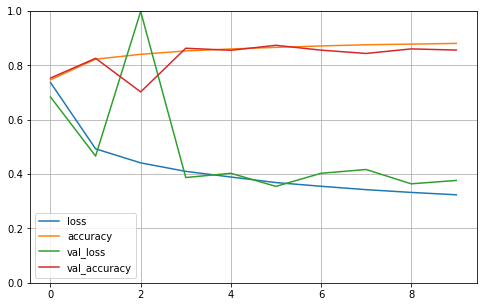

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
ev = model.evaluate(X_test,y_test)
print(ev)

313/313 [==============================] - 4s 14ms/step - loss: 0.4166 - accuracy: 0.8468
[0.41657519340515137, 0.8468000292778015]


In [17]:
X_new = X_test[0:3]
y_pred = model.predict_classes(X_new)
print(y_pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1]


In [18]:
y_test[0:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


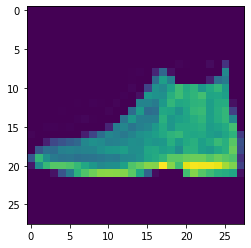

In [19]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [21]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [22]:
del model